In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-digit-recognizer/train.csv


In [39]:
df = pd.read_csv('/kaggle/input/mnist-digit-recognizer/train.csv')
df.shape

(42000, 785)

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.sample(1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
244,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


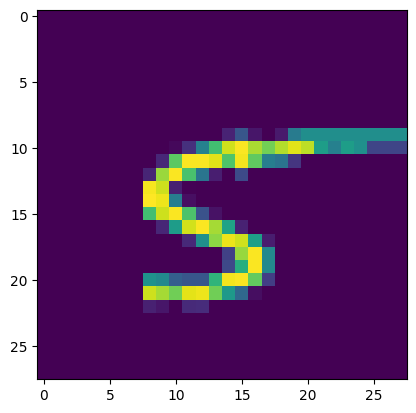

In [7]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[244,1:].values.reshape(28,28))
plt.show()

In [8]:
#once more for another random number
df.sample(1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
23359,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


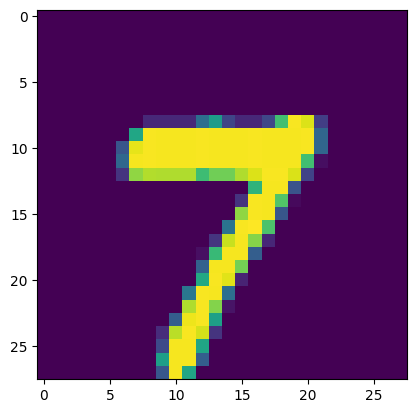

In [9]:
plt.imshow(df.iloc[23359,1:].values.reshape(28,28))
plt.show()

In [40]:
# train test split
X = df.iloc[:,1:]
y = df.iloc[:,0]
X.shape,y.shape

((42000, 784), (42000,))

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
model = KNeighborsClassifier()

model.fit(X_trian,y_train)

In [19]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
y = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y)

0.9680952380952381

In [27]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [54]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [46]:
X_train.shape

(33600, 784)

In [55]:
model1 = KNeighborsClassifier()

In [56]:
model1.fit(X_train_pca,y_train)
y1 = model1.predict(X_test_pca)
accuracy_score(y_test,y1)

0.9501190476190476

In [59]:
for i in range(1,784):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    model1 = KNeighborsClassifier()
    model1.fit(X_train_pca,y_train)
    y1 = model1.predict(X_test_pca)
    print(accuracy_score(y_test,y1))

0.26345238095238094
0.3230952380952381
0.5111904761904762
0.6686904761904762
0.7407142857142858
0.8261904761904761
0.840952380952381
0.8711904761904762
0.8876190476190476
0.9085714285714286
0.9170238095238096
0.9217857142857143
0.9325
0.9352380952380952
0.9361904761904762
0.9373809523809524
0.9401190476190476
0.9413095238095238
0.9425
0.9433333333333334
0.9426190476190476
0.944047619047619
0.9448809523809524
0.945595238095238
0.9465476190476191
0.9461904761904761
0.9445238095238095
0.9457142857142857
0.9477380952380953
0.9471428571428572
0.9473809523809524
0.949047619047619
0.9489285714285715
0.9480952380952381
0.9510714285714286
0.9515476190476191
0.9530952380952381
0.9547619047619048
0.9528571428571428
0.9536904761904762
0.9535714285714286
0.9538095238095238
0.9542857142857143
0.9534523809523809
0.9551190476190476
0.9532142857142857
0.9530952380952381
0.9542857142857143
0.9536904761904762
0.9528571428571428
0.9530952380952381
0.9534523809523809
0.9528571428571428
0.9528571428571428
0

KeyboardInterrupt: 

In [60]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [61]:
X_train_pca.shape

(33600, 2)

In [63]:
import plotly.express as px
y_train_tr = y_train.astype(str)
fig = px.scatter(X_train_pca[:,0],
                X_train_pca[:,1],
                color=y_train_tr,
                color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [64]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [65]:
X_train_pca.shape

(33600, 3)

In [66]:
y_train_tr = y_train.astype(str)
fig = px.scatter_3d(df,x=X_train_pca[:,0],y=X_train_pca[:,1],z=X_train_pca[:,2],
                   color=y_train_tr)
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))
fig.show()

In [67]:
pca.explained_variance_

array([40.64115119, 29.26140846, 26.64277363])

In [69]:
pca.components_.shape

(3, 784)

In [70]:
# finding the ratio of the eigen vectors 
pca.explained_variance_ratio_

array([0.05830695, 0.04198069, 0.03822379])

In [71]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [72]:
pca.components_.shape

(784, 784)

In [73]:
pca.explained_variance_ratio_

array([5.83069464e-02, 4.19806853e-02, 3.82237890e-02, 2.99115159e-02,
       2.58748632e-02, 2.27008412e-02, 1.99181162e-02, 1.79797980e-02,
       1.59385496e-02, 1.44560523e-02, 1.38562105e-02, 1.24492919e-02,
       1.15119932e-02, 1.13424713e-02, 1.07110491e-02, 1.02951072e-02,
       9.66728711e-03, 9.47629549e-03, 9.28196326e-03, 9.03792228e-03,
       8.53649059e-03, 8.26288062e-03, 7.94170437e-03, 7.63846377e-03,
       7.41556539e-03, 7.11610601e-03, 7.04734462e-03, 6.81501263e-03,
       6.44113258e-03, 6.29955011e-03, 6.23008130e-03, 6.14309357e-03,
       5.93474807e-03, 5.81338525e-03, 5.78103546e-03, 5.62246157e-03,
       5.51424377e-03, 5.31447897e-03, 5.16496129e-03, 5.04507920e-03,
       4.94783916e-03, 4.89615197e-03, 4.72839588e-03, 4.70319591e-03,
       4.58153617e-03, 4.54549102e-03, 4.52189700e-03, 4.47588589e-03,
       4.36530486e-03, 4.28496360e-03, 4.14376740e-03, 4.10474105e-03,
       4.06067246e-03, 4.00513090e-03, 3.95755427e-03, 3.82446042e-03,
      

In [74]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05830695, 0.10028763, 0.13851142, 0.16842294, 0.1942978 ,
       0.21699864, 0.23691676, 0.25489656, 0.2708351 , 0.28529116,
       0.29914737, 0.31159666, 0.32310865, 0.33445112, 0.34516217,
       0.35545728, 0.36512457, 0.37460086, 0.38388283, 0.39292075,
       0.40145724, 0.40972012, 0.41766182, 0.42530029, 0.43271585,
       0.43983196, 0.4468793 , 0.45369432, 0.46013545, 0.466435  ,
       0.47266508, 0.47880817, 0.48474292, 0.49055631, 0.49633734,
       0.5019598 , 0.50747405, 0.51278853, 0.51795349, 0.52299857,
       0.52794641, 0.53284256, 0.53757095, 0.54227415, 0.54685569,
       0.55140118, 0.55592307, 0.56039896, 0.56476427, 0.56904923,
       0.573193  , 0.57729774, 0.58135841, 0.58536354, 0.5893211 ,
       0.59314556, 0.5969215 , 0.6006662 , 0.60430766, 0.60791184,
       0.61141996, 0.61491038, 0.61834564, 0.62177429, 0.6251811 ,
       0.62851747, 0.63182195, 0.63504067, 0.63824855, 0.64141191,
       0.64453498, 0.6476157 , 0.65067708, 0.65371506, 0.65673

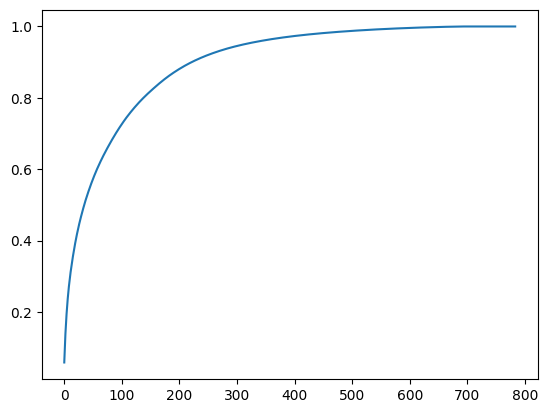

In [75]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))